In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from CCDPApy.helper import output_path

pd.set_option('display.max_columns', 200)

In [3]:
# loading data
path = output_path('GT_output_2.xlsx')
df = pd.read_excel(path)
df.head(3)

Experiment Data Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0  Date (MM/DD/YY H:MM:SS AM/PM)  Cell Line         ID       Name   
1            2023-01-01 00:00:00       CL G     295008   Genetech   
2            2023-01-01 10:00:00       CL G     295008   Genetech   

            Unnamed: 4          Unnamed: 5                   Unnamed: 6  \
0  Initial Volume (mL)  Sample Volume (mL)  Volume Before Sampling (mL)   
1             12000000                   0                     12000000   
2             12000000                   0                     12000000   

                   Unnamed: 7             Unnamed: 8   Unnamed: 9 Unnamed: 10  \
0  Volume After Sampling (mL)  Feed Media Added (mL)  Feed Status      # Feed   
1                    12000000                      0            0           2   
2                    12000000                      0            0           2   

       Unnamed: 11 Unnamed: 12                                Unnamed: 13  \
0  Base Added (mL)  Osmolarity  Viable Cell Concentration (10^6 cells/mL)   
1                0  310.390602                                   0.707812   
2                0  294.969383                                   1.685265   

                               Unnamed: 14  \
0  Dead Cell Concentration (10^6 cells/mL)   
1                                 0.006987   
2                                  0.05182   

                                Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0  Total Cell Concentration (10^6 cells/mL)  IgG (mg/L)        NH4+   
1                                    0.7148           0    3.071507   
2                                  1.737085           0    3.621828   

  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  \
0         Na+       Titer     IntvPCV         PCV        pCO2       pHoff   
1   46.345103    1.059949           0    0.167421   93.000259    6.960743   
2   45.663156    1.059949     0.34761    0.258416   81.143342    7.002544   

  Unnamed: 24 Unnamed: 25    Unnamed: 26       Unnamed: 27   Unnamed: 28  \
0         pO2  air sparge  air sparge sp  air sparge total  backpressure   
1  101.258254   11.408122       5.688135       12734.85202      1.978115   
2   99.957496    53.19031      26.830021       26831.18445      1.981209   

  Unnamed: 29       Unnamed: 30            Unnamed: 31  Unnamed: 32  \
0  co2 sparge  co2 sparge total  do2 controller output  do2 primary   
1    3.245566       2785.682712               1.547035    29.921898   
2    3.325126       1858.298578               7.096126    28.151353   

     Unnamed: 33       Unnamed: 34    Unnamed: 35          Unnamed: 36  \
0  do2 secondary  flowrate overlay  oxygen sparge  oxygen sparge total   
1      29.161844        250.984953              0                    0   
2      28.057887        251.001728              0                    0   

            Unnamed: 37 Unnamed: 38             Unnamed: 39   Unnamed: 40  \
0  ph controller output  ph primary  pressure exhaust valve  sparge total   
1             46.003623    7.028866               70.414004     11.278256   
2             45.862719    7.030608               70.302097     53.020003   

   Unnamed: 41         Unnamed: 42       Unnamed: 43  Unnamed: 44  \
0  temperature  temperature jacket  weight load cell  Titer_range   
1    36.949926           37.437632        9452.84421    1.05-1.10   
2    37.042912           37.259285       10349.50443    1.05-1.10   

   Unnamed: 45    Unnamed: 46     Unnamed: 47     Unnamed: 48    Unnamed: 49  \
0  Titer_group  Viability (%)  Titer_category  Run Time (day)  Run Time (hr)   
1   Middle 60%      99.022465               0               0              0   
2   Middle 60%       97.01684               0               0             10   

  Concentration Before Feeding   Unnamed: 51 Concentration After Feeding  \
0                 Glucose (mM)  Lactate (mM)                Glucose (mM)   
1                    62.829937      5.794531                   62.829937   
2   

In [7]:
# Rename
rename_cols = ['Concentration After Feeding', 'Unnamed: 53', 'SP. Rate Polynomial Regression', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66']
new_names = ['Glucose_after_feed (mM)', 'Lactate_after_feed (mM)', 'qCell_poly (hr^-1)', 'qIgG_poly (mg/10^9 cells/hr)', 'qGlucose_poly (mmol/10^9 cells/hr)', 'qLactate_poly (mmol/10^9 cells/hr)']
df.loc[0, rename_cols] = new_names
df.head(3)

Experiment Data Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0  Date (MM/DD/YY H:MM:SS AM/PM)  Cell Line         ID       Name   
1            2023-01-01 00:00:00       CL G     295008   Genetech   
2            2023-01-01 10:00:00       CL G     295008   Genetech   

            Unnamed: 4          Unnamed: 5                   Unnamed: 6  \
0  Initial Volume (mL)  Sample Volume (mL)  Volume Before Sampling (mL)   
1             12000000                   0                     12000000   
2             12000000                   0                     12000000   

                   Unnamed: 7             Unnamed: 8   Unnamed: 9 Unnamed: 10  \
0  Volume After Sampling (mL)  Feed Media Added (mL)  Feed Status      # Feed   
1                    12000000                      0            0           2   
2                    12000000                      0            0           2   

       Unnamed: 11 Unnamed: 12                                Unnamed: 13  \
0  Base Added (mL)  Osmolarity  Viable Cell Concentration (10^6 cells/mL)   
1                0  310.390602                                   0.707812   
2                0  294.969383                                   1.685265   

                               Unnamed: 14  \
0  Dead Cell Concentration (10^6 cells/mL)   
1                                 0.006987   
2                                  0.05182   

                                Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0  Total Cell Concentration (10^6 cells/mL)  IgG (mg/L)        NH4+   
1                                    0.7148           0    3.071507   
2                                  1.737085           0    3.621828   

  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  \
0         Na+       Titer     IntvPCV         PCV        pCO2       pHoff   
1   46.345103    1.059949           0    0.167421   93.000259    6.960743   
2   45.663156    1.059949     0.34761    0.258416   81.143342    7.002544   

  Unnamed: 24 Unnamed: 25    Unnamed: 26       Unnamed: 27   Unnamed: 28  \
0         pO2  air sparge  air sparge sp  air sparge total  backpressure   
1  101.258254   11.408122       5.688135       12734.85202      1.978115   
2   99.957496    53.19031      26.830021       26831.18445      1.981209   

  Unnamed: 29       Unnamed: 30            Unnamed: 31  Unnamed: 32  \
0  co2 sparge  co2 sparge total  do2 controller output  do2 primary   
1    3.245566       2785.682712               1.547035    29.921898   
2    3.325126       1858.298578               7.096126    28.151353   

     Unnamed: 33       Unnamed: 34    Unnamed: 35          Unnamed: 36  \
0  do2 secondary  flowrate overlay  oxygen sparge  oxygen sparge total   
1      29.161844        250.984953              0                    0   
2      28.057887        251.001728              0                    0   

            Unnamed: 37 Unnamed: 38             Unnamed: 39   Unnamed: 40  \
0  ph controller output  ph primary  pressure exhaust valve  sparge total   
1             46.003623    7.028866               70.414004     11.278256   
2             45.862719    7.030608               70.302097     53.020003   

   Unnamed: 41         Unnamed: 42       Unnamed: 43  Unnamed: 44  \
0  temperature  temperature jacket  weight load cell  Titer_range   
1    36.949926           37.437632        9452.84421    1.05-1.10   
2    37.042912           37.259285       10349.50443    1.05-1.10   

   Unnamed: 45    Unnamed: 46     Unnamed: 47     Unnamed: 48    Unnamed: 49  \
0  Titer_group  Viability (%)  Titer_category  Run Time (day)  Run Time (hr)   
1   Middle 60%      99.022465               0               0              0   
2   Middle 60%       97.01684               0               0             10   

  Concentration Before Feeding   Unnamed: 51 Concentration After Feeding  \
0                 Glucose (mM)  Lactate (mM)     Glucose_after_feed (mM)   
1                    62.829937      5.794531                   62.829937   
2   

In [8]:
# Get the first row and set it as column names
df.columns = df.iloc[0]
# Drop the first row after setting it as column names
df = df[1:]
df.head(3)

0 Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

0 Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

0 Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed  \
1                   12000000                     0           0      2   
2                   12000000                     0           0      2   
3                   12000000                     0           0      2   

0 Base Added (mL)  Osmolarity Viable Cell Concentration (10^6 cells/mL)  \
1               0  310.390602                                  0.707812   
2               0  294.969383                                  1.685265   
3               0  297.612555                                  1.544325   

0 Dead Cell Concentration (10^6 cells/mL)  \
1                                0.006987   
2                                 0.05182   
3                                0.047093   

0 Total Cell Concentration (10^6 cells/mL) IgG (mg/L)      NH4+        Na+  \
1                                   0.7148          0  3.071507  46.345103   
2                                 1.737085          0  3.621828  45.663156   
3                                 1.591418          0  4.172149  44.981209   

0     Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

0 air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

0 do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

0 oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

0 pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

0 weight load cell Titer_range Titer_group Viability (%) Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%     99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%      97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%     97.040803              0   

0 Run Time (day) Run Time (hr) Glucose (mM) Lactate (mM)  \
1              0             0    62.829937     5.794531   
2              0            10    62.126848      9.07807   
3              0            20    59.375606    13.064794   

0 Glucose_after_feed (mM) Lactate_after_feed (mM) Cell (10^6 cells)  \
1               62.829937                5.794531                 0   
2               62.126848                 9.07807      11729439.144   
3               59.375606               13.064794      10038154.356   

0 IVCC (10^6 cells hr/mL) IgG (mg) Glucose (mmol) Lactate (mmo

In [9]:
# Rename Columns
df = df.rename(columns={
    'Base Added (mL)': 'base',
    'Osmolarity': 'osmo',
    'Viable Cell Concentration (10^6 cells/mL)': 'vcd',
    'Dead Cell Concentration (10^6 cells/mL)': 'dcd',
    'Total Cell Concentration (10^6 cells/mL)': 'tcd',
    'Viability (%)': 'viab',
    'Glucose (mM)': 'glc',
    'Lactate (mM)': 'lac',
    'Glucose_after_feed (mM)': 'glc_after',
    'Lactate_after_feed (mM)': 'lac_after',
    'Cell (10^6 cells)': 'ccell',
    'IVCC (10^6 cells hr/mL)': 'ivcc',
    'Glucose (mmol)': 'cglc',
    'Lactate (mmol)': 'clac',
    'Cell (hr^-1)': 'mu',
    'Glucose (mmol/10^9 cells/hr)': 'qglc',
    'Lactate (mmol/10^9 cells/hr)': 'qlac',
    'qCell_poly (hr^-1)': 'mu_poly', 
    'qGlucose_poly (mmol/10^9 cells/hr)': 'qglc_poly',
    'qLactate_poly (mmol/10^9 cells/hr)': 'qlac_poly',
})
df.head(3)

0 Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

0 Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

0 Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed base  \
1                   12000000                     0           0      2    0   
2                   12000000                     0           0      2    0   
3                   12000000                     0           0      2    0   

0        osmo       vcd       dcd       tcd IgG (mg/L)      NH4+        Na+  \
1  310.390602  0.707812  0.006987    0.7148          0  3.071507  46.345103   
2  294.969383  1.685265   0.05182  1.737085          0  3.621828  45.663156   
3  297.612555  1.544325  0.047093  1.591418          0  4.172149  44.981209   

0     Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

0 air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

0 do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

0 oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

0 pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

0 weight load cell Titer_range Titer_group       viab Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%  99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%   97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%  97.040803              0   

0 Run Time (day) Run Time (hr)        glc        lac  glc_after  lac_after  \
1              0             0  62.829937   5.794531  62.829937   5.794531   
2              0            10  62.126848    9.07807  62.126848    9.07807   
3              0            20  59.375606  13.064794  59.375606  13.064794   

0         ccell       ivcc IgG (mg)          cglc          clac        mu  \
1             0          0        0             0             0       NaN   
2  11729439.144  11.965388        0   8437.068541   39402.46825   0.08169   
3  10038154.356   28.11334        0  41451.971625  87243.157993 -0.008728   

0 IgG (mg/10^9 cells/hr)      qglc      qlac   mu_poly  \
1                    NaN       NaN       NaN       NaN   
2                      0   0.05876   0.27442  0.064368   
3                      0  0.170377  0.246887   0.04399   

0 qIgG_poly (mg/10^9 cells/hr) qglc_poly qlac_poly  
1                            0  0.127912   0.36173  
2                            0  0.080913  0.138233  
3                            0   0.11614  0.

In [9]:
# rename species cncentration before and after feed
# rename species specific rate with regressions
'''old_columns = np.array(df.columns)
columns_rename = ['Glucose (mM)', 'Lactate (mM)',
                  #'mu', 'qGlucose', 'qLactate'
                  ]
indices = [i for i, col in enumerate(old_columns) if col in columns_rename]

new_columns = old_columns.copy()
new_columns[indices] = ['glc', 'lac', 
                        'glc_after', 'lac_after',
                        #'mu', 'qglc', 'qlac',
                        #'Poly mu', 'Poly qGlucose', 'Poly qLactate'
                        ]

df.columns = new_columns
df.head(3)'''

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

  Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

  Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed base  \
1                   12000000                     0           0      2    0   
2                   12000000                     0           0      2    0   
3                   12000000                     0           0      2    0   

         osmo       vcd       dcd       tcd IgG (mg/L)      NH4+        Na+  \
1  310.390602  0.707812  0.006987    0.7148          0  3.071507  46.345103   
2  294.969383  1.685265   0.05182  1.737085          0  3.621828  45.663156   
3  297.612555  1.544325  0.047093  1.591418          0  4.172149  44.981209   

      Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

  air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

  do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

  oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

  pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

  weight load cell Titer_range Titer_group       viab Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%  99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%   97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%  97.040803              0   

  Run Time (day) Run Time (hr)        glc        lac  glc_after  lac_after  \
1              0             0  62.829937   5.794531  62.829937   5.794531   
2              0            10  62.126848    9.07807  62.126848    9.07807   
3              0            20  59.375606  13.064794  59.375606  13.064794   

          ccell       ivcc IgG (mg)          cglc          clac        mu  \
1             0          0        0             0             0       NaN   
2  11729439.144  11.965388        0   8437.068541   39402.46825   0.08169   
3  10038154.356   28.11334        0  41451.971625  87243.157993 -0.008728   

  IgG (mg/10^9 cells/hr)      qglc      qlac  
1                    NaN       NaN       NaN  
2                      0   0.05876   0.27442  
3                      0  0.170377  0.246887

In [7]:
# Interpolation the first value in polynomial mu
'''for run_id, grouped_df in df.groupby(by='ID'):
    y = grouped_df['Poly mu'].astype(np.float64).interpolate(method='spline', limit_direction='backward', order=3)
    ind = df['ID']==run_id
    df.loc[ind, 'Poly mu'] = y

df.head()'''

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   
4           2023-01-02 06:00:00      CL G  295008  Genetech   
5           2023-01-02 16:00:00      CL G  295008  Genetech   

  Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   
4            12000000                  0                    12000000   
5            12000000                  0                    12000000   

  Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed  \
1                   12000000                     0           0      2   
2                   12000000                     0           0      2   
3                   12000000                     0           0      2   
4                   12000000                     0           0      2   
5                   12000000                     0           0      2   

  Base Added  Osmolarity       VCD       DCD       TCD IgG (mg/L)      NH4+  \
1          0  310.390602  0.707812  0.006987    0.7148          0  3.071507   
2          0  294.969383  1.685265   0.05182  1.737085          0  3.621828   
3          0  297.612555  1.544325  0.047093  1.591418          0  4.172149   
4          0  297.060884  1.858663  0.056206  1.914869          0  4.532507   
5          0  293.574929  2.494772  0.104573  2.599345          0   4.69915   

         Na+     Titer   IntvPCV       PCV       pCO2     pHoff         pO2  \
1  46.345103  1.059949         0  0.167421  93.000259  6.960743  101.258254   
2  45.663156  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   
3  44.981209  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738   
4  44.299261  1.059949  3.521618  0.482487  59.669689  7.004803   94.844104   
5  40.892881  1.059949  5.738774   0.63456  52.337375  6.976747   88.469988   

   air sparge air sparge sp air sparge total backpressure co2 sparge  \
1   11.408122      5.688135      12734.85202     1.978115   3.245566   
2    53.19031     26.830021      26831.18445     1.981209   3.325126   
3   71.584015       35.7517      64305.34848     1.972489   3.253458   
4   93.778188     46.761039      113614.7156      1.96413   3.507787   
5  125.706899     62.624315      178875.4956     1.965074   3.354045   

  co2 sparge total do2 controller output do2 primary do2 secondary  \
1      2785.682712              1.547035   29.921898     29.161844   
2      1858.298578              7.096126   28.151353     28.057887   
3      3794.494966              9.549251   30.234508     30.208355   
4      5868.770835             12.521825   28.366251     29.168578   
5      7993.900298             16.706876   29.904632     30.813889   

  flowrate overlay oxygen sparge oxygen sparge total ph controller output  \
1       250.984953             0                   0            46.003623   
2       251.001728             0                   0            45.862719   
3       250.950363             0                   0            45.911384   
4       250.965823             0                   0            45.679751   
5       250.743895             0                   0             45.84741   

  ph primary pressure exhaust valve sparge total temperature  \
1   7.028866              70.414004    11.278256   36.949926   
2   7.030608              70.302097    53.020003   37.042912   
3   7.028387              71.111027    71.403806   36.996902   
4   7.031762               71.87717     93.97431   36.996902   
5   7.029856              72.944823   125.554414   37.041984   

  temperature jacket weight load cell Titer_range Titer_group  Viability  \
1          37.437632   

In [10]:
df.columns

Index(['Date (MM/DD/YY H:MM:SS AM/PM)', 'Cell Line', 'ID', 'Name',
       'Initial Volume (mL)', 'Sample Volume (mL)',
       'Volume Before Sampling (mL)', 'Volume After Sampling (mL)',
       'Feed Media Added (mL)', 'Feed Status', '# Feed', 'base', 'osmo', 'vcd',
       'dcd', 'tcd', 'IgG (mg/L)', 'NH4+', 'Na+', 'Titer', 'IntvPCV', 'PCV',
       'pCO2', 'pHoff', 'pO2', 'air sparge', 'air sparge sp',
       'air sparge total', 'backpressure', 'co2 sparge', 'co2 sparge total',
       'do2 controller output', 'do2 primary', 'do2 secondary',
       'flowrate overlay', 'oxygen sparge', 'oxygen sparge total',
       'ph controller output', 'ph primary', 'pressure exhaust valve',
       'sparge total', 'temperature', 'temperature jacket', 'weight load cell',
       'Titer_range', 'Titer_group', 'viab', 'Titer_category',
       'Run Time (day)', 'Run Time (hr)', 'glc', 'lac', 'glc_after',
       'lac_after', 'ccell', 'ivcc', 'IgG (mg)', 'cglc', 'clac', 'mu',
       'IgG (mg/10^9 cells/hr)',

In [11]:
def make_plot_df(data):
    '''create dataframe for plotting'''
    columns_drop = [
        'Date (MM/DD/YY H:MM:SS AM/PM)', 
        'Cell Line', 
        'Name',
        'Initial Volume (mL)', 
        'Sample Volume (mL)', 
        'Volume Before Sampling (mL)', 
        'Volume After Sampling (mL)',
        'Feed Media Added (mL)', 
        'Feed Status', 
        '# Feed', 
        'IgG (mg/L)', 
        'IgG (mg)', 
        'IgG (mg/10^9 cells/hr)',
        'IgG_poly (mg/10^9 cells/hr)'
    ]
    df = data.drop(columns=columns_drop, axis=1)
    id_cols = [
        'ID', 'Titer', 'Titer_range', 'Titer_group', 'Titer_category',
        'Run Time (day)', 'Run Time (hr)', 'glc_after', 'lac_after',
    ]
    plot_df = df.melt(id_vars=id_cols, var_name='Parameter', value_name="Value")
    return plot_df

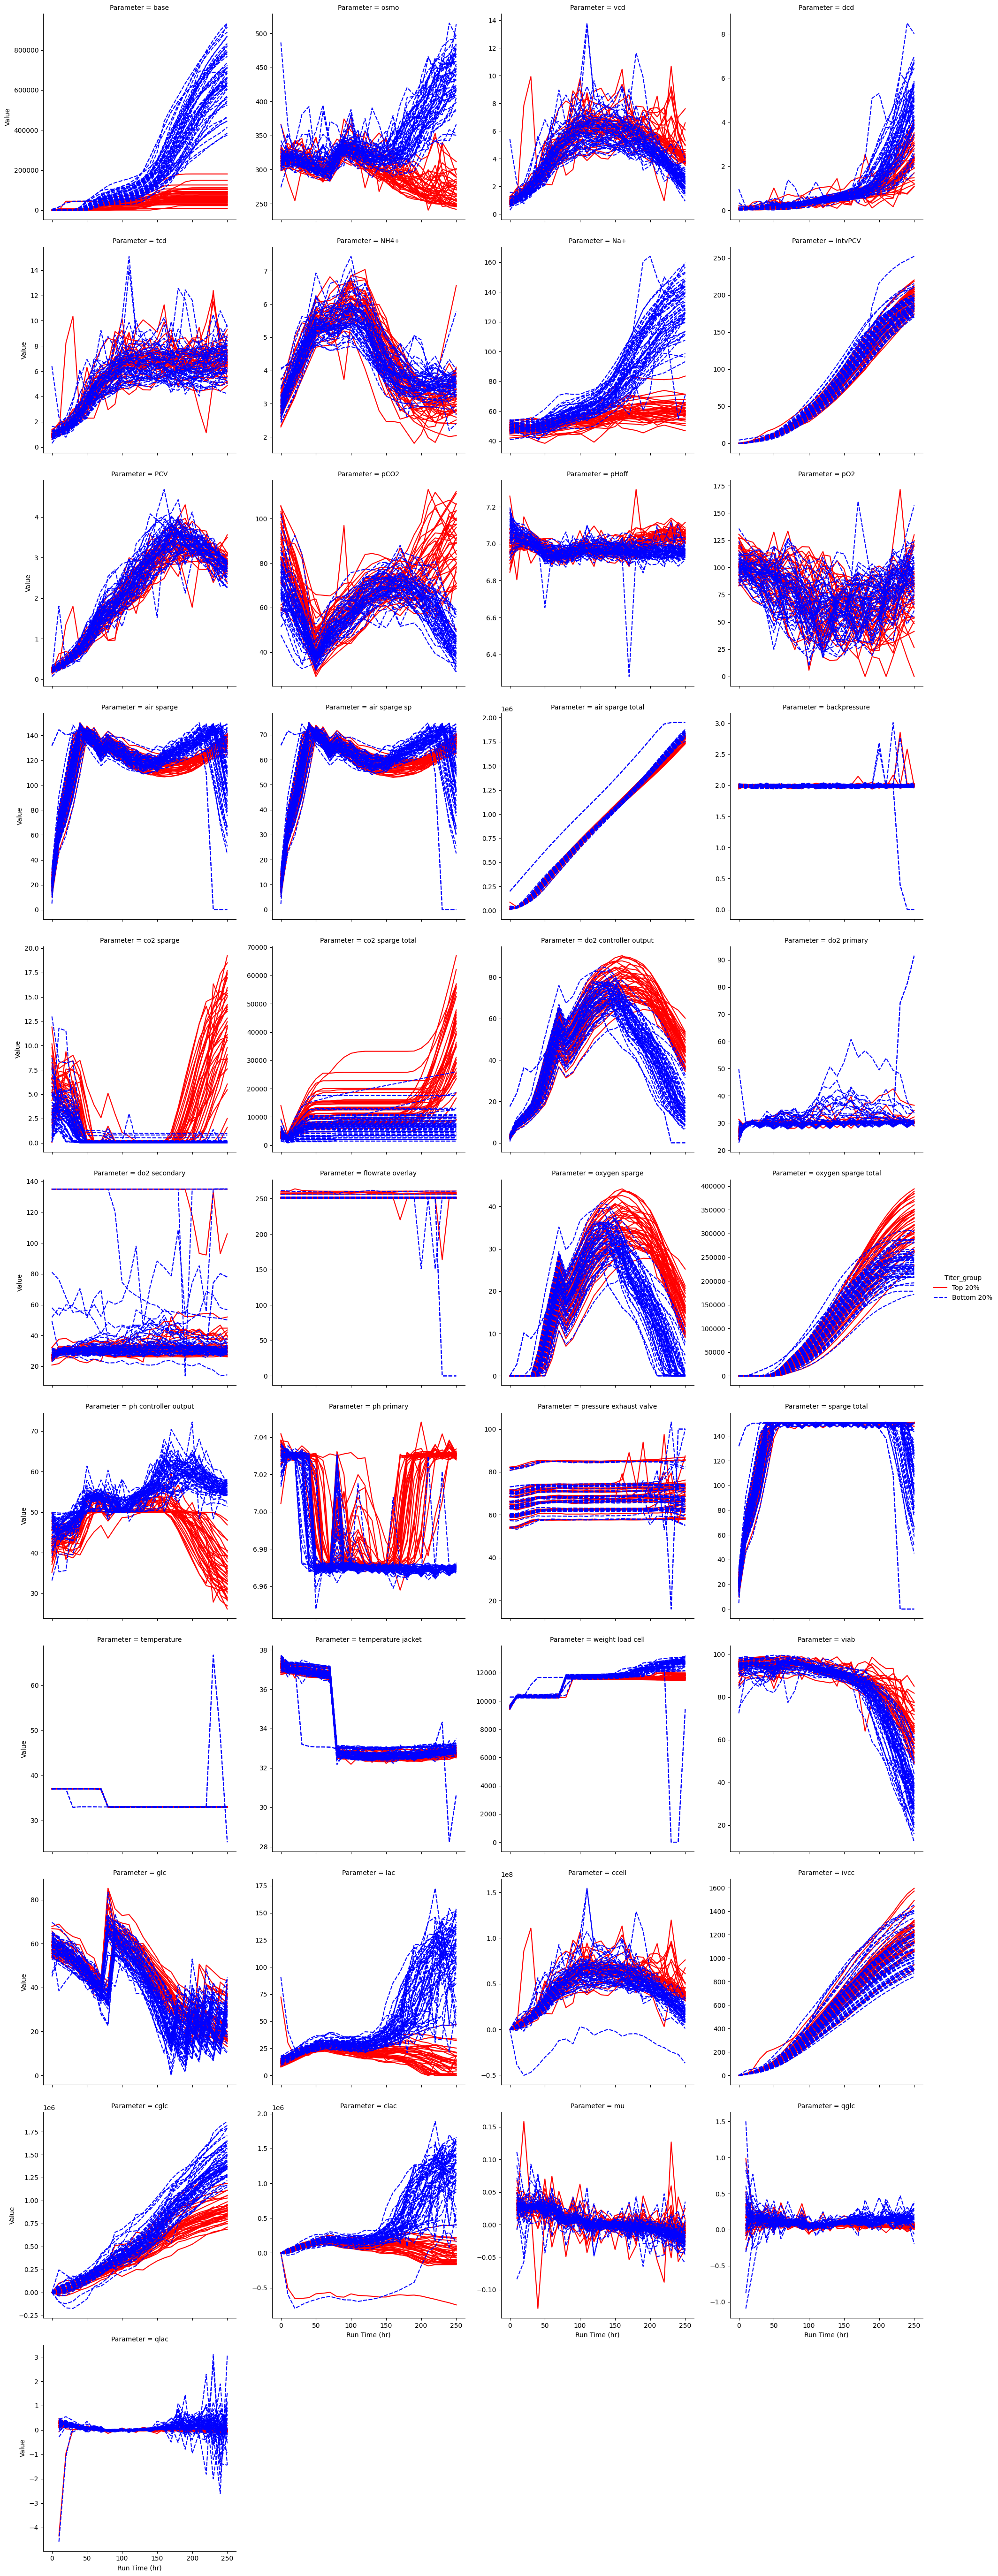

In [12]:
# Plotting Profiles
plot_df = make_plot_df(data=df)
colors = ["r", "b"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Parameter',
            col_wrap=4,
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()

# Removing outliers

In [11]:
# Find ID
# df[(df['Run Time (hr)']==0) & (df['Lactate BF'] > 60)]

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
3875           2023-01-01 00:00:00      CL G  755846  Genetech   
5669           2023-01-01 00:00:00      CL G  836570  Genetech   

     Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
3875            12000000                  0                    12000000   
5669            12000000                  0                    12000000   

     Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed  \
3875                   12000000                     0           0      1   
5669                   12000000                     0           0      3   

     Base Added  Osmolarity       VCD       DCD       TCD IgG (mg/L)  \
3875          0  313.562256  0.820394  0.041861  0.862255          0   
5669          0  323.653452  0.857593  0.056461  0.914054          0   

          NH4+        Na+     Titer IntvPCV       PCV       pCO2     pHoff  \
3875  2.810739  47.039168  1.126322       0   0.22988  75.800172  7.057305   
5669  2.799735  54.037902  0.839875       0  0.291801   66.52627  7.165667   

             pO2 air sparge air sparge sp air sparge total backpressure  \
3875  130.415791  25.200389     12.533837       12581.2044     1.977482   
5669  106.840236  24.351013     11.758914      21510.61763     1.958366   

     co2 sparge co2 sparge total do2 controller output do2 primary  \
3875   6.505571       4774.71157              3.338903   24.909938   
5669   0.105837      3687.208477              3.225068   24.799514   

     do2 secondary flowrate overlay oxygen sparge oxygen sparge total  \
3875     26.425838       256.337653             0                   0   
5669     25.161263         256.0224             0                   0   

     ph controller output ph primary pressure exhaust valve sparge total  \
3875            42.244056   7.035113              59.821728    24.970693   
5669                   50   7.013448              60.257919    24.054534   

     temperature temperature jacket weight load cell Titer_range Titer_group  \
3875   37.003494          37.127162      9675.841279   1.10-1.15     Top 20%   
5669   37.058212          37.300212      9608.331025   0.80-0.85  Bottom 20%   

      Viability Titer_category Run Time (day) Run Time (hr) Glucose BF  \
3875  95.145177              1              0             0  56.857517   
5669  93.823012              2              0             0  69.639389   

     Lactate BF Glucose AF Lactate AF Cum Cell IVCC IgG (mg) Cum Glucose  \
3875    72.1747  56.857517    72.1747        0    0        0           0   
5669  90.612145  69.639389  90.612145        0    0        0           0   

     Cum Lactate   mu IgG (mg/10^9 cells/hr) qGlucose qLactate   Poly mu  \
3875           0  NaN                    NaN      NaN      NaN  0.062823   
5669           0  NaN                    NaN      NaN      NaN  0.087076   

     IgG (mg/10^9 cells/hr) Poly qGlucose Poly qLactate  
3875                      0      0.218059     -0.976553  
5669                      0       0.49882     -0.930226

In [12]:
# Find ID
# df[(df['weight load cell']<2000)]

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
2156           2023-01-10 14:00:00      CL G  318938  Genetech   
2157           2023-01-11 00:00:00      CL G  318938  Genetech   
2650           2023-01-10 14:00:00      CL G  322405  Genetech   
2651           2023-01-11 00:00:00      CL G  322405  Genetech   

     Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
2156            12000000                  0                    12000000   
2157            12000000                  0                    12000000   
2650            12000000                  0                    12000000   
2651            12000000                  0                    12000000   

     Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed  \
2156                   12000000                     0           0      4   
2157                   12000000                     0           0      4   
2650                   12000000                     0           0      4   
2651                   12000000                     0           0      4   

       Base Added  Osmolarity       VCD       DCD       TCD IgG (mg/L)  \
2156  688924.7437  408.901832  3.544285  3.537431  7.081717          0   
2157  688924.7437  410.785662  2.745553  4.402833  7.148386          0   
2650  688924.7437   467.39087  3.526091  2.320691  5.846782          0   
2651  688924.7437  460.142128  2.676398  2.899115  5.575513          0   

          NH4+         Na+     Titer     IntvPCV       PCV       pCO2  \
2156  3.615357  116.770848  0.850267  187.179049  3.009473  44.958603   
2157  3.564666  119.727796  0.850267    192.4428   2.82168  39.593853   
2650  3.425614  131.087745   0.80685  166.930716  2.996313  54.392952   
2651  3.455883  135.411913   0.80685  173.371672  2.827497  49.117467   

         pHoff        pO2 air sparge air sparge sp air sparge total  \
2156  6.929158  85.292032          0             0       1949164.75   
2157  6.958026  98.851751          0             0       1949164.75   
2650  6.949632  92.457852          0             0       1949164.75   
2651  6.936681  85.452701          0             0       1949164.75   

     backpressure co2 sparge co2 sparge total do2 controller output  \
2156      0.39626          0      2006.797485                     0   
2157     0.006354          0      2006.797485                     0   
2650      0.39626          0      2006.797485                     0   
2651     0.006354          0      2006.797485                     0   

     do2 primary do2 secondary flowrate overlay oxygen sparge  \
2156   74.155949     74.133785                0             0   
2157   81.268269     80.170289                0             0   
2650   74.155949     74.133785                0             0   
2651   81.268269     80.170289                0             0   

     oxygen sparge total ph controller output ph primary  \
2156         208847.6094            56.731624   6.967977   
2157         208847.6094            56.198598   6.966541   
2650         208847.6094            57.539229   6.971438   
2651         208847.6094            56.846598   6.966957   

     pressure exhaust valve sparge total temperature temperature jacket  \
2156                     16            0   66.725577          34.322147   
2157                    100            0   48.838476          28.228166   
2650                     16            0   66.725577          34.322147   
2651                    100            0   48.838476          28.228166   

     weight load cell Titer_range Titer_group  Viability Titer_category  \
2156         5.464086   0.85-0.90  Bottom 20%  50.048391              2   
2157                0   0.85-0.90  Bottom 20%  38.408013              2   
2650         5.464086   0.80-0.85  Bottom 20%  60.308239              2   
2651                0   0.80-0.85  Bottom 20%  48.002723              2   

     Run Time (day) Run Time (hr) Glucose BF  Lactate BF Glucose AF  \
2156              

In [13]:
# Remove 
'''id_remove = ['755846', '836570', '318938', '322405']

df = df[(df['ID']!='755846') & (df['ID']!='836570') & (df['ID']!='318938') & (df['ID']!='322405')]

df['ID'].unique().size'''

239

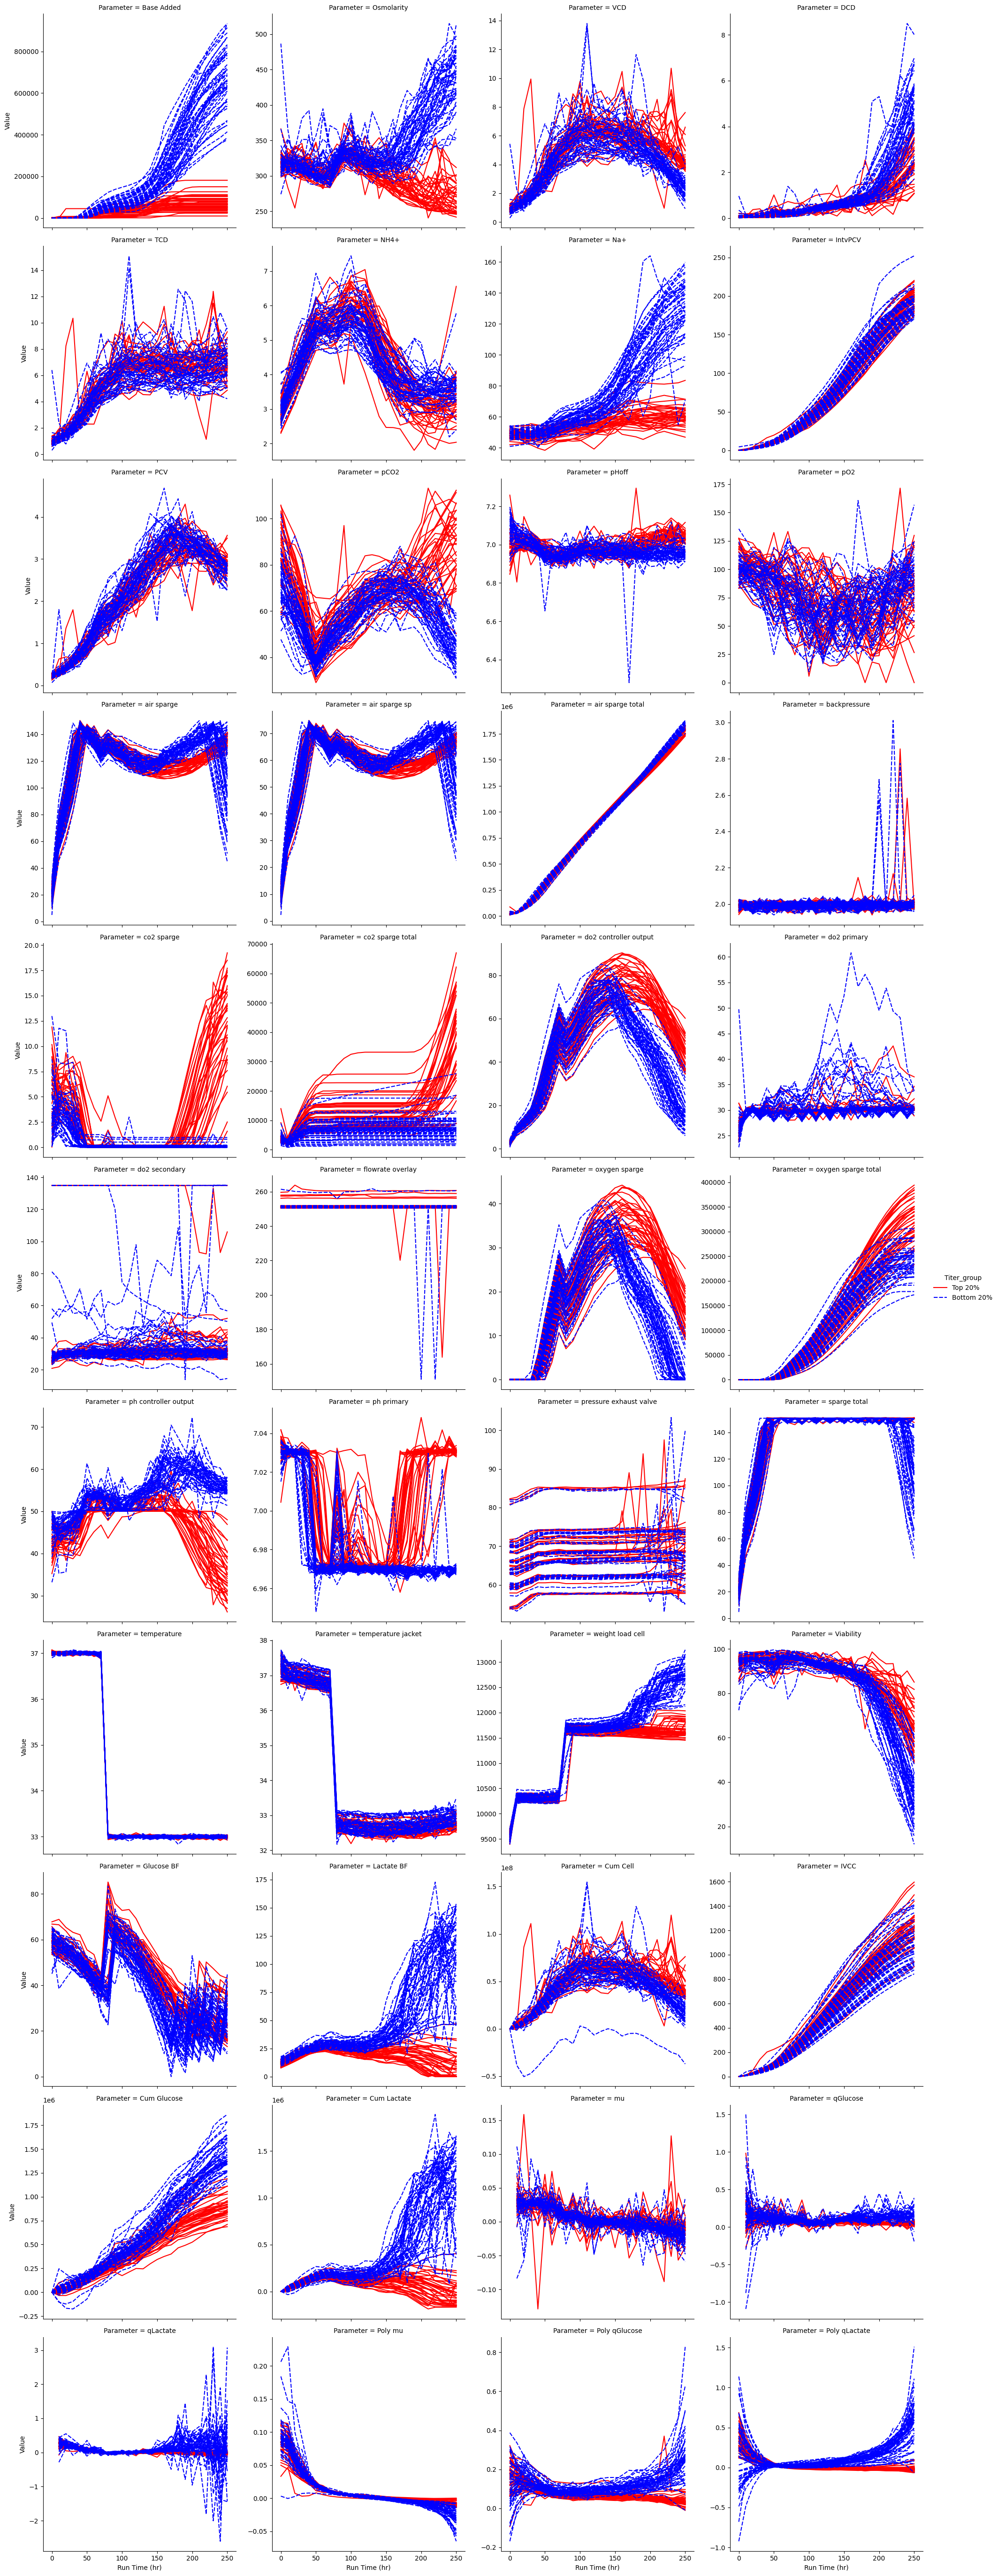

In [14]:
# Plotting Profiles
'''plot_df = make_plot_df(data=df)

colors = ["r", "b"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Parameter',
            col_wrap=4,
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()'''

# Smoothing

In [15]:
df.head(3)

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

  Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

  Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed  \
1                   12000000                     0           0      2   
2                   12000000                     0           0      2   
3                   12000000                     0           0      2   

  Base Added  Osmolarity       VCD       DCD       TCD IgG (mg/L)      NH4+  \
1          0  310.390602  0.707812  0.006987    0.7148          0  3.071507   
2          0  294.969383  1.685265   0.05182  1.737085          0  3.621828   
3          0  297.612555  1.544325  0.047093  1.591418          0  4.172149   

         Na+     Titer   IntvPCV       PCV       pCO2     pHoff         pO2  \
1  46.345103  1.059949         0  0.167421  93.000259  6.960743  101.258254   
2  45.663156  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   
3  44.981209  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738   

  air sparge air sparge sp air sparge total backpressure co2 sparge  \
1  11.408122      5.688135      12734.85202     1.978115   3.245566   
2   53.19031     26.830021      26831.18445     1.981209   3.325126   
3  71.584015       35.7517      64305.34848     1.972489   3.253458   

  co2 sparge total do2 controller output do2 primary do2 secondary  \
1      2785.682712              1.547035   29.921898     29.161844   
2      1858.298578              7.096126   28.151353     28.057887   
3      3794.494966              9.549251   30.234508     30.208355   

  flowrate overlay oxygen sparge oxygen sparge total ph controller output  \
1       250.984953             0                   0            46.003623   
2       251.001728             0                   0            45.862719   
3       250.950363             0                   0            45.911384   

  ph primary pressure exhaust valve sparge total temperature  \
1   7.028866              70.414004    11.278256   36.949926   
2   7.030608              70.302097    53.020003   37.042912   
3   7.028387              71.111027    71.403806   36.996902   

  temperature jacket weight load cell Titer_range Titer_group  Viability  \
1          37.437632       9452.84421   1.05-1.10  Middle 60%  99.022465   
2          37.259285      10349.50443   1.05-1.10  Middle 60%   97.01684   
3           37.37155      10343.89697   1.05-1.10  Middle 60%  97.040803   

  Titer_category Run Time (day) Run Time (hr) Glucose BF Lactate BF  \
1              0              0             0  62.829937   5.794531   
2              0              0            10  62.126848    9.07807   
3              0              0            20  59.375606  13.064794   

  Glucose AF Lactate AF      Cum Cell       IVCC IgG (mg)   Cum Glucose  \
1  62.829937   5.794531             0          0        0             0   
2  62.126848    9.07807  11729439.144  11.965388        0   8437.068541   
3  59.375606  13.064794  10038154.356   28.11334        0  41451.971625   

    Cum Lactate        mu IgG (mg/10^9 cells/hr)  qGlucose  qLactate  \
1             0       NaN                    NaN       NaN       NaN   
2   39402.46825   0.08169                      0   0.05876   0.27442   
3  87243.157993 -0.008728                      0  0.170377  0.246887   

    Poly mu IgG (mg/10^9 cells/hr) Poly qGlucose Poly qLactate  
1  0.070206                      0      0.127912       0.36173  
2  0.064368                      0      0.080913      0.138233  
3   0.04399               

In [16]:
parameters_smooth = [
    'ID', 'Run Time (hr)', 'Titer_group',
    'Osmolarity', 'VCD', 'NH4+', 'Na+', 'Lactate BF', 'Cum Glucose']

temp_df = df[parameters_smooth].copy()
temp_df['Data'] = 'Raw'
temp_df.head(3)

ID Run Time (hr) Titer_group  Osmolarity       VCD      NH4+  \
1  295008             0  Middle 60%  310.390602  0.707812  3.071507   
2  295008            10  Middle 60%  294.969383  1.685265  3.621828   
3  295008            20  Middle 60%  297.612555  1.544325  4.172149   

         Na+ Lactate BF   Cum Glucose Data  
1  46.345103   5.794531             0  Raw  
2  45.663156    9.07807   8437.068541  Raw  
3  44.981209  13.064794  41451.971625  Raw

In [17]:
from scipy import signal

def smoothing(x):
    # 
    window_length = 20
    poly_order = 3
    x_smoothed = signal.savgol_filter(x, window_length=window_length, polyorder=poly_order, mode="nearest")
    return x_smoothed

In [18]:
# Applying smoothing function
'''df_list = []
cols = [
    'Osmolarity', 'VCD', 'NH4+', 'Na+', 'Lactate BF', 'Cum Glucose']

for run_id, group_df in temp_df.groupby(by='ID'):
    temp = group_df[cols]
    group_df.loc[:, cols] = temp.apply(smoothing)
    df_list.append(group_df)

smoothed_df = pd.concat(df_list, axis=0)
smoothed_df['Data'] = 'Smoothed'

smooth_df = pd.concat([temp_df, smoothed_df], axis=0)
smooth_df.head()'''

"df_list = []\ncols = [\n    'Osmolarity', 'VCD', 'NH4+', 'Na+', 'Lactate BF', 'Cum Glucose']\n\nfor run_id, group_df in temp_df.groupby(by='ID'):\n    temp = group_df[cols]\n    group_df.loc[:, cols] = temp.apply(smoothing)\n    df_list.append(group_df)\n\nsmoothed_df = pd.concat(df_list, axis=0)\nsmoothed_df['Data'] = 'Smoothed'\n\nsmooth_df = pd.concat([temp_df, smoothed_df], axis=0)\nsmooth_df.head()"

In [19]:
'''id_cols = ['ID', 'Titer_group', 'Run Time (hr)', 'Data']
plot_df = smooth_df.melt(id_vars=id_cols, var_name='Parameter', value_name="Value")
plot_df.head()

# Plotting Profiles
colors = ["r", "b"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], 
            x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Data',
            row='Parameter',
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()'''

'id_cols = [\'ID\', \'Titer_group\', \'Run Time (hr)\', \'Data\']\nplot_df = smooth_df.melt(id_vars=id_cols, var_name=\'Parameter\', value_name="Value")\nplot_df.head()\n\n# Plotting Profiles\ncolors = ["r", "b"]\nsns.set_palette(colors)\nx = \'Run Time (hr)\'\ny = \'Value\'\nsns.relplot(data=plot_df[plot_df[\'Titer_group\']!=\'Middle 60%\'], \n            x=x, y=y, kind=\'line\',\n            estimator=None, units=\'ID\',\n            hue=\'Titer_group\', hue_order=[\'Top 20%\', \'Bottom 20%\'],\n            style=\'Titer_group\', style_order=[\'Top 20%\', \'Bottom 20%\'],\n            col=\'Data\',\n            row=\'Parameter\',\n            facet_kws={\'sharey\': False, \'sharex\': True},)\nplt.show()'

In [20]:
# Plotting Profiles
'''colors = ["gray"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']=='Middle 60%'], 
            x=x, y=y, kind='line',
            estimator=None, units='ID',
            col='Data',
            row='Parameter',
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()'''

'colors = ["gray"]\nsns.set_palette(colors)\nx = \'Run Time (hr)\'\ny = \'Value\'\nsns.relplot(data=plot_df[plot_df[\'Titer_group\']==\'Middle 60%\'], \n            x=x, y=y, kind=\'line\',\n            estimator=None, units=\'ID\',\n            col=\'Data\',\n            row=\'Parameter\',\n            facet_kws={\'sharey\': False, \'sharex\': True},)\nplt.show()'

# Save as csv

In [13]:
df.head(3)

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

  Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

  Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed base  \
1                   12000000                     0           0      2    0   
2                   12000000                     0           0      2    0   
3                   12000000                     0           0      2    0   

         osmo       vcd       dcd       tcd IgG (mg/L)      NH4+        Na+  \
1  310.390602  0.707812  0.006987    0.7148          0  3.071507  46.345103   
2  294.969383  1.685265   0.05182  1.737085          0  3.621828  45.663156   
3  297.612555  1.544325  0.047093  1.591418          0  4.172149  44.981209   

      Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

  air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

  do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

  oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

  pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

  weight load cell Titer_range Titer_group       viab Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%  99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%   97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%  97.040803              0   

  Run Time (day) Run Time (hr)        glc        lac  glc_after  lac_after  \
1              0             0  62.829937   5.794531  62.829937   5.794531   
2              0            10  62.126848    9.07807  62.126848    9.07807   
3              0            20  59.375606  13.064794  59.375606  13.064794   

          ccell       ivcc IgG (mg)          cglc          clac        mu  \
1             0          0        0             0             0       NaN   
2  11729439.144  11.965388        0   8437.068541   39402.46825   0.08169   
3  10038154.356   28.11334        0  41451.971625  87243.157993 -0.008728   

  IgG (mg/10^9 cells/hr)      qglc      qlac  
1                    NaN       NaN       NaN  
2                      0   0.05876   0.27442  
3                      0  0.170377  0.246887

In [14]:
# saving
path = output_path('genetech_raw_2.csv')
df.to_csv(path, index=False)